In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import imghdr
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

C:\Users\afree\AppData\Local\Temp\ipykernel_20556\504688636.py:7: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
#model_names = ["Convertible", "Coupe", "Hatchback", "Pick-Up", "SUV", "Sedan", "VAN"]
model_names = sorted(os.listdir("D:\\projects\\cnn\\dataset\\Cars_Body_Type\\train"))

In [214]:
model_names

['Convertible', 'Coupe', 'Hatchback', 'Pick-Up', 'SUV', 'Sedan', 'VAN']

In [216]:
model_names = ['Convertible', 'Coupe', 'Hatchback', 'Pick-Up', 'SUV', 'Sedan', 'VAN']

In [6]:
train_path = "D:\\projects\\cnn\\dataset\\Cars_Body_Type\\train"

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    class_names=model_names,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)


Found 7549 files belonging to 7 classes.


In [8]:
os.listdir(train_path)

['Convertible', 'Coupe', 'Hatchback', 'Pick-Up', 'Sedan', 'SUV', 'VAN']

In [9]:
os.listdir(os.path.join(train_path,'Convertible'))

['00006_Geo-Metro-Convertible-1993_jpg.rf.af144a70a0889c74cdb7039604457ff9.jpg',
 '00022_BMW-M6-Convertible-2010_jpg.rf.19521ef3e3c871dd995cb4c2d2788eba.jpg',
 '00037_BMW-Z4-Convertible-2012_jpg.rf.10fadda6971dcb8fa61fd630bd40bfd2.jpg',
 '00044_BMW-Z4-Convertible-2012_jpg.rf.4ee197266b4f3633af6d450243ea0841.jpg',
 '00065_Aston-Martin-V8-Vantage-Convertible-2012_jpg.rf.20346ae1021efda8e349d350b8de2c53.jpg',
 '00081_Aston-Martin-V8-Vantage-Convertible-2012_jpg.rf.e08ebec7ab2fb528f06f613500bcf217.jpg',
 '00093_Rolls-Royce-Phantom-Drophead-Coupe-Convertible-2012_jpg.rf.0bef1871fd7c36e0cf902f0d995090f9.jpg',
 '00134_Mercedes-Benz-300-Class-Convertible-1993_jpg.rf.491a23de6a3854af9ff421eaa8c13556.jpg',
 '00150_Aston-Martin-V8-Vantage-Convertible-2012_jpg.rf.02a15ea04524eeef15af99c0e1b63480.jpg',
 '00165_BMW-M6-Convertible-2010_jpg.rf.56a6bb8baa3348c08d25ce1105c0e233.jpg',
 '00183_Mercedes-Benz-300-Class-Convertible-1993_jpg.rf.8c53001d5022310da4782b7835758759.jpg',
 '00195_Chrysler-Sebring-C

In [10]:
img = cv2.imread(os.path.join(train_path,'Convertible','2_jpg.rf.24650216f8433a852fd51c26cacddeeb.jpg'))

In [11]:
print(img)

[[[230 198 169]
  [231 199 170]
  [232 200 171]
  ...
  [212 214 222]
  [213 216 224]
  [199 205 212]]

 [[230 198 169]
  [231 199 170]
  [231 199 170]
  ...
  [217 218 228]
  [200 206 213]
  [183 189 196]]

 [[228 198 169]
  [229 199 170]
  [229 199 170]
  ...
  [213 215 225]
  [189 194 203]
  [175 180 189]]

 ...

 [[136 177 222]
  [137 178 223]
  [134 175 220]
  ...
  [127 166 210]
  [134 173 217]
  [132 171 215]]

 [[126 167 212]
  [127 168 213]
  [128 169 214]
  ...
  [126 165 209]
  [121 160 204]
  [117 156 200]]

 [[122 164 209]
  [122 164 209]
  [122 163 208]
  ...
  [120 159 203]
  [111 150 194]
  [110 149 193]]]


In [12]:
img.shape

(725, 1495, 3)

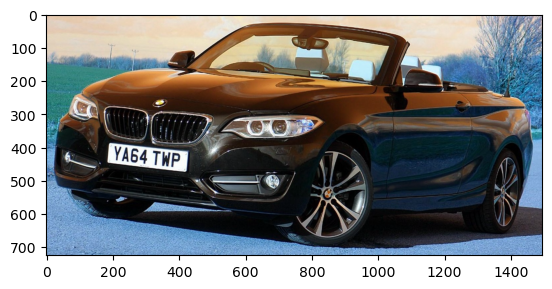

In [13]:
plt.imshow(img)

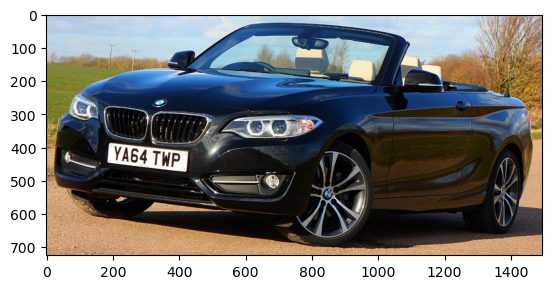

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
#load data
import numpy as np
from matplotlib import pyplot as plt

In [16]:
#building the pipeline, i.e, not storing and loading all the image into the memory due to large capacity. we have all the images in a pipeline.
data = tf.keras.utils.image_dataset_from_directory(train_path)

Found 7549 files belonging to 7 classes.


In [17]:
#since not all images loaded in memory to see the image we have use iterator to generate the image from our pipeline.
#accessing image from the pipeline
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

In [19]:
batch

(array([[[[132.0145   , 132.0145   , 122.0145   ],
          [133.51031  , 133.51031  , 123.51031  ],
          [133.33789  , 133.33789  , 123.33789  ],
          ...,
          [ 69.557335 ,  83.557335 ,  83.557335 ],
          [ 66.38053  ,  80.420135 ,  80.30132  ],
          [ 77.222946 ,  92.222946 ,  89.222946 ]],
 
         [[138.11523  , 138.11523  , 128.45508  ],
          [137.67969  , 137.67969  , 128.01953  ],
          [136.84766  , 136.84766  , 127.1875   ],
          ...,
          [ 67.51953  ,  81.68945  ,  81.17969  ],
          [ 63.106766 ,  77.85709  ,  75.368484 ],
          [ 76.8826   ,  91.8826   ,  88.542755 ]],
 
         [[143.11523  , 143.11523  , 135.11523  ],
          [142.13281  , 142.13281  , 134.13281  ],
          [141.30078  , 141.30078  , 133.30078  ],
          ...,
          [ 69.640236 ,  84.640236 ,  81.16897  ],
          [ 68.383255 ,  83.383255 ,  78.81445  ],
          [ 74.99238  ,  89.99238  ,  84.99238  ]],
 
         ...,
 
         [[1

In [20]:
#2 parts: one image part and one labels part
len(batch)

2

In [21]:
batch[0]

array([[[[132.0145   , 132.0145   , 122.0145   ],
         [133.51031  , 133.51031  , 123.51031  ],
         [133.33789  , 133.33789  , 123.33789  ],
         ...,
         [ 69.557335 ,  83.557335 ,  83.557335 ],
         [ 66.38053  ,  80.420135 ,  80.30132  ],
         [ 77.222946 ,  92.222946 ,  89.222946 ]],

        [[138.11523  , 138.11523  , 128.45508  ],
         [137.67969  , 137.67969  , 128.01953  ],
         [136.84766  , 136.84766  , 127.1875   ],
         ...,
         [ 67.51953  ,  81.68945  ,  81.17969  ],
         [ 63.106766 ,  77.85709  ,  75.368484 ],
         [ 76.8826   ,  91.8826   ,  88.542755 ]],

        [[143.11523  , 143.11523  , 135.11523  ],
         [142.13281  , 142.13281  , 134.13281  ],
         [141.30078  , 141.30078  , 133.30078  ],
         ...,
         [ 69.640236 ,  84.640236 ,  81.16897  ],
         [ 68.383255 ,  83.383255 ,  78.81445  ],
         [ 74.99238  ,  89.99238  ,  84.99238  ]],

        ...,

        [[170.25517  , 173.25517  , 16

In [22]:
#automatically reshaped to 256 puxels and batch of 32 images
batch[0].shape

(32, 256, 256, 3)

In [23]:
#labels of images
#total 32 images
#0 to 6 tells us the labels of images from 0 being the convertible to 6 = van
batch[1]

array([4, 6, 3, 5, 3, 5, 1, 5, 4, 2, 4, 6, 2, 0, 2, 5, 5, 5, 0, 5, 0, 2,
       3, 6, 5, 5, 0, 0, 6, 5, 2, 3])

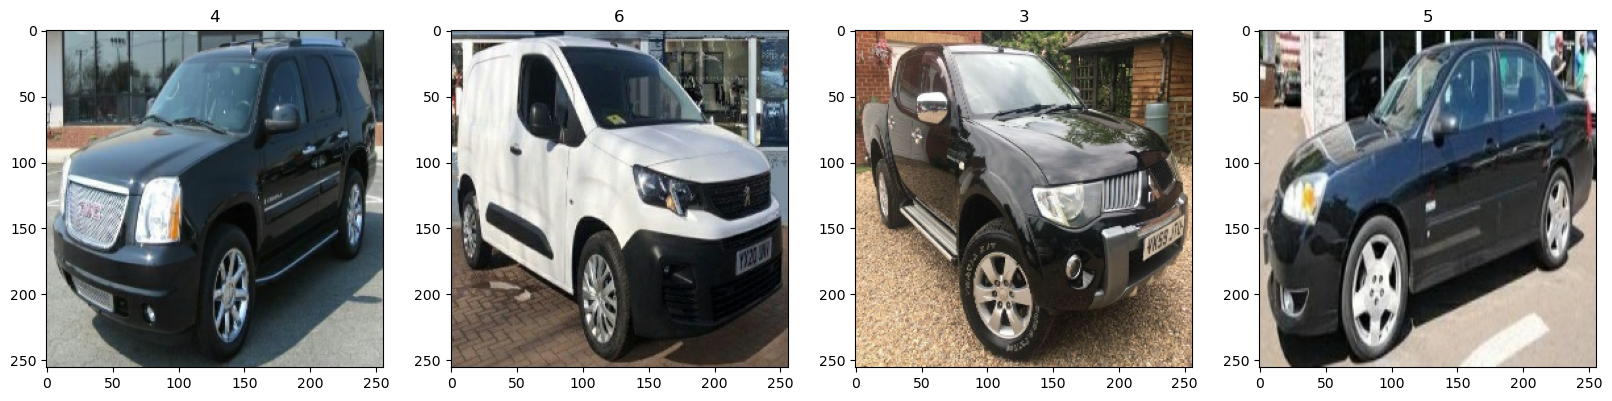

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [27]:
#scaling the data inside the pipeline
#scaling the data of all batches right inside the pipeline instead of scaling every single batch
data = data.map(lambda x,y: (x/255, y)) #x represents the one part of images from batch and y represent the another part of labels from batch

In [28]:
#iterator to keeping fetching the next batch
scaled_iterator = data.as_numpy_iterator()

In [29]:
batch = scaled_iterator.next()

In [30]:
batch[0].max()

1.0

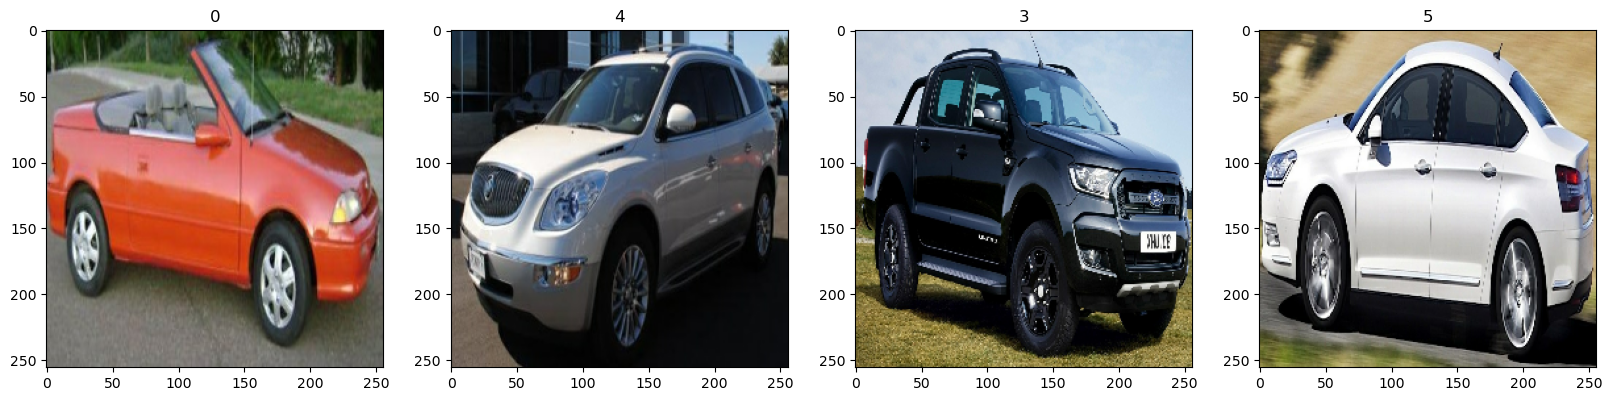

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [32]:
#now all our images are scaled to 0 to 1

In [33]:
# preprocessing
#spliting the data into train and test
len(data) #236 total batches #so 32 images in 1 batch # 236*32=7552 images in train folder

236

In [34]:
train_size = int(len(data)*.7) #70% train data
val_size = int(len(data)*.2) #20% validation data
test_size = int(len(data)*.1) #10% test data

In [35]:
train_size #165 batches #to train our model

165

In [36]:
val_size #to run reports and evaluation metrics to validate our model
#to fine tune our model

47

In [37]:
test_size #this part is not going to be touched until end
#to test our data

23

In [38]:
train_size+val_size+test_size

235

In [39]:
#now we are using 'take' and 'skip' to use our train and test data
train1 = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [40]:
len(train1)

165

In [41]:
len(val)

47

In [42]:
len(test)

23

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#data augemntation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# augmentation to dataset train1(entire dataset)
def augment_data(images, labels):
    augmented_images = tf.py_function(
        lambda images: np.array([train_datagen.random_transform(img.numpy()) for img in images]),
        inp=[images],
        Tout=tf.float32 
    )
    return augmented_images, labels

In [44]:
#building the model
#1.build deep model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [45]:
#using resnet for higher accuracy and to solve overfitting
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [46]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(7, activation='softmax')(x)

In [58]:
model = models.Model(inputs=base_model.input, outputs=predictions)

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
#custom cnn #gives low accuracy
''' #custom cnn model gives lower accuracy
#filters
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3))) #16 filters #3x3 matrix filter #1x1 stride for max pooling
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax')) #single output '''

" #custom cnn model gives lower accuracy\n#filters\nmodel.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3))) #16 filters #3x3 matrix filter #1x1 stride for max pooling\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(32,(3,3),1, activation='relu', input_shape=(256,256,3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\n\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dense(7, activation='softmax')) #single output "

In [62]:
#compile
'''model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])'''


#for resnet50
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 262, 262, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 128, 128, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 128, 128, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 128, 128, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 130, 130, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 64, 64, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 64, 64, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 64, 64, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,114,055 (91.99 MB)

 Trainable params: 24,060,935 (91.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [66]:
#2.train
logdir='logs'

In [68]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [78]:
#when tested with epochs=20, the accuracy was 75.34% (due to kernel disconnect, had to train epochs again)
#when epochs=18, accuracy=68% (reduced epochs to 18 due longer time consumption)
hist = model.fit(train1, epochs=18, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/18
165/165 ━━━━━━━━━━━━━━━━━━━━ 1612s 9s/step - accuracy: 0.5143 - loss: 1.4285 - val_accuracy: 0.1815 - val_loss: 2.8271
Epoch 2/18
165/165 ━━━━━━━━━━━━━━━━━━━━ 1513s 9s/step - accuracy: 0.7791 - loss: 0.6060 - val_accuracy: 0.1270 - val_loss: 5.0952
Epoch 3/18
165/165 ━━━━━━━━━━━━━━━━━━━━ 1482s 9s/step - accuracy: 0.8797 - loss: 0.3518 - val_accuracy: 0.2746 - val_loss: 2.4977
Epoch 4/18
165/165 ━━━━━━━━━━━━━━━━━━━━ 1500s 9s/step - accuracy: 0.9142 - loss: 0.2738 - val_accuracy: 0.5578 - val_loss: 1.2219
Epoch 5/18
165/165 ━━━━━━━━━━━━━━━━━━━━ 1522s 9s/step - accuracy: 0.9213 - loss: 0.2358 - val_accuracy: 0.7174 - val_loss: 0.9544
Epoch 6/18
165/165 ━━━━━━━━━━━━━━━━━━━━ 1480s 9s/step - accuracy: 0.9320 - loss: 0.1947 - val_accuracy: 0.8677 - val_loss: 0.4150
Epoch 7/18
165/165 ━━━━━━━━━━━━━━━━━━━━ 1548s 9s/step - accuracy: 0.9573 - loss: 0.1390 - val_accuracy: 0.7952 - val_loss: 0.5732
Epoch 8/18
165/165 ━━━━━━━━━━━━━━━━━━━━ 1560s 9s/step - accuracy: 0.9566 - loss: 0.1363 - 

In [80]:
hist.history

{'accuracy': [0.6248105764389038,
  0.8081439137458801,
  0.8787878751754761,
  0.9151515364646912,
  0.925000011920929,
  0.9340909123420715,
  0.9534090757369995,
  0.9575757384300232,
  0.9651514887809753,
  0.9626893997192383,
  0.9664772748947144,
  0.9808712005615234,
  0.9744318127632141,
  0.9598484635353088,
  0.9691287875175476,
  0.9731060862541199,
  0.9721590876579285,
  0.9755681753158569],
 'loss': [1.0614650249481201,
  0.5281615257263184,
  0.35530799627304077,
  0.2655102014541626,
  0.22603146731853485,
  0.19842934608459473,
  0.14580169320106506,
  0.13364854454994202,
  0.1095123291015625,
  0.12039580941200256,
  0.10676421225070953,
  0.06754326075315475,
  0.08487093448638916,
  0.11748427152633667,
  0.1029689759016037,
  0.0840281993150711,
  0.09339543431997299,
  0.08055958896875381],
 'val_accuracy': [0.18151596188545227,
  0.12699468433856964,
  0.2746010720729828,
  0.5578457713127136,
  0.717420220375061,
  0.8676861524581909,
  0.7952127456665039,
  0.

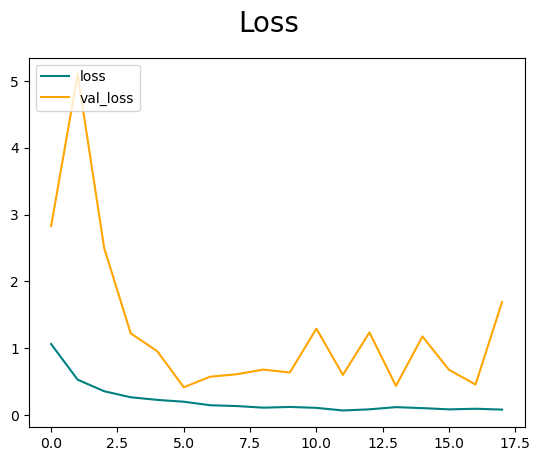

In [82]:
#resulted in overfitting (custom cnn)
#no overfitting using resnet50
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

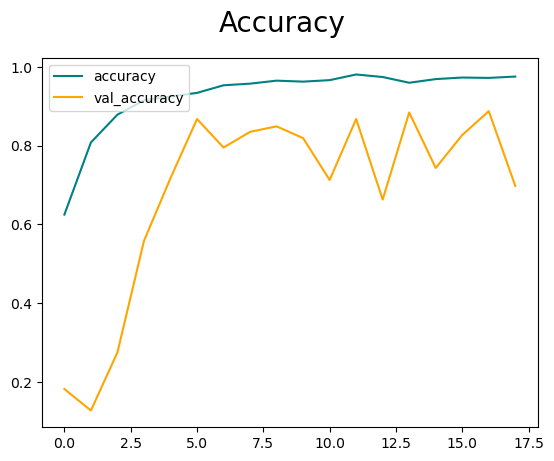

In [84]:
#(overfitting with custom cnn)
#no overfitting using resnet50
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [86]:
#evaluating the model
from tensorflow.keras.metrics import Precision, Recall, Accuracy

In [88]:
precision = Precision()
recall = Recall()
accuracy = Accuracy()

In [90]:
#looping through all the batches in test data and calculating metrics
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    yhat = tf.argmax(yhat, axis=1)
    y = tf.cast(y, tf.int64)  
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [92]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}') #for custom cnn model

Precision:0.9950166344642639, Recall:0.9553428888320923, Accuracy:0.6820651888847351


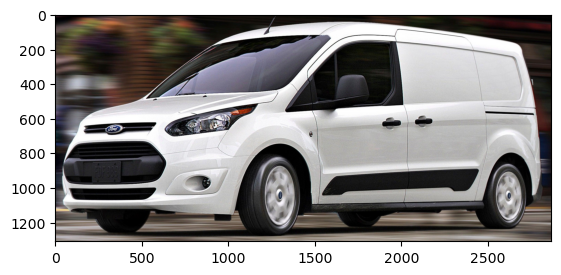

In [162]:
#testing 
import cv2
img = cv2.imread("D:\\projects\\cnn\\dataset\\Cars_Body_Type\\van1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


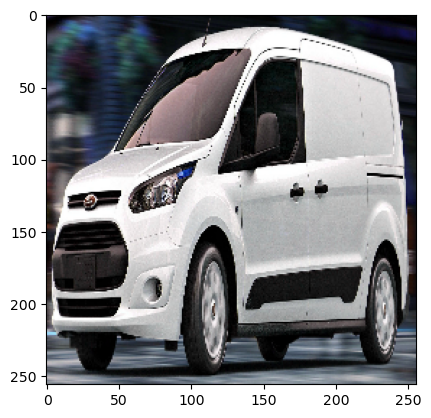

In [164]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [166]:
np.expand_dims(resize,0)

array([[[[ 86.50239  ,  73.35981  , 135.13324  ],
         [ 89.40105  ,  74.40105  , 136.3444   ],
         [ 82.49805  ,  71.55469  , 121.328125 ],
         ...,
         [ 15.388672 ,  21.473522 ,  32.30382  ],
         [ 19.53125  ,  25.570965 ,  38.378254 ],
         [ 15.042969 ,  24.042969 ,  36.816406 ]],

        [[ 60.920578 ,  49.75521  ,  94.73568  ],
         [ 60.175797 ,  47.34572  ,  92.16993  ],
         [ 50.721348 ,  41.89127  ,  74.55142  ],
         ...,
         [  5.9068947,   9.567051 ,  10.397129 ],
         [  6.2421837,   9.90234  ,  10.732418 ],
         [  9.759766 ,  11.419922 ,  12.25     ]],

        [[ 36.640404 ,  29.624779 ,  56.30078  ],
         [ 33.56836  ,  25.134766 ,  49.71875  ],
         [ 23.50739  ,  16.430794 ,  37.583984 ],
         ...,
         [  2.7167969,   2.7167969,   2.7167969],
         [  3.7167969,   3.7167969,   3.7167969],
         [  3.9717903,   3.9717903,   3.9717903]],

        ...,

        [[124.99805  , 131.48741  , 14

In [168]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [170]:
yhat

array([[3.7634618e-05, 2.7680735e-04, 3.9069373e-03, 3.3316959e-05,
        1.2612639e-03, 4.4339171e-04, 9.9404067e-01]], dtype=float32)

In [172]:
#Convertible-0, Coupe-1, Hatchback-2, Pick-Up-3, SUV-4, Sedan-5, VAN-6
predicted_class_index = np.argmax(yhat[0])
print("Predicted Class index: ", predicted_class_index)

Predicted Class index:  6


In [174]:
#saving the model
from tensorflow.keras.models import load_model

In [176]:
model.save(os.path.join('models','carbody_cnn.h5'))

In [178]:
#checking path of saved model
os.path.join('models','carbody_cnn.h5')

'models\\carbody_cnn.h5'

In [180]:
#loading the model 
new_model = load_model(os.path.join('models','carbody_cnn.h5'))

In [182]:
new_model

<Functional name=functional, built=True>

In [184]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [186]:
yhatnew

array([[3.7634618e-05, 2.7680735e-04, 3.9069373e-03, 3.3316959e-05,
        1.2612639e-03, 4.4339171e-04, 9.9404067e-01]], dtype=float32)

In [188]:
#model works fine
predicted_class_index = np.argmax(yhat[0])
print("Predicted Class index: ", predicted_class_index)

Predicted Class index:  6


Test Labels: [0, 3, 5, 6, 0, 5, 5, 5, 0, 4, 4, 0, 0, 5, 6, 6, 4, 4, 6, 5, 5, 0, 6, 5, 1, 3, 4, 0, 2, 0, 4, 4, 6, 4, 1, 4, 4, 4, 3, 2, 2, 3, 4, 2, 2, 1, 3, 3, 0, 6, 5, 3, 5, 5, 5, 4, 3, 0, 5, 4, 2, 5, 3, 4, 5, 1, 5, 4, 1, 0, 0, 3, 4, 5, 3, 4, 4, 0, 0, 3, 3, 3, 4, 6, 0, 4, 0, 6, 6, 4, 3, 2, 3, 4, 2, 3, 4, 2, 0, 1, 1, 3, 3, 1, 2, 0, 3, 5, 1, 3, 2, 0, 0, 3, 5, 6, 0, 2, 5, 1, 2, 4, 0, 1, 3, 3, 4, 3, 3, 1, 6, 0, 2, 3, 1, 0, 5, 3, 3, 5, 2, 5, 4, 6, 4, 0, 2, 1, 4, 2, 0, 4, 4, 2, 2, 1, 4, 4, 5, 6, 5, 3, 0, 6, 6, 3, 4, 6, 0, 3, 2, 6, 6, 1, 3, 5, 2, 2, 4, 0, 1, 1, 3, 3, 1, 6, 6, 6, 5, 6, 5, 3, 5, 3, 1, 0, 5, 1, 0, 0, 5, 2, 1, 3, 4, 5, 6, 1, 3, 6, 4, 6, 4, 6, 5, 2, 5, 2, 2, 3, 2, 2, 0, 4, 0, 6, 0, 3, 4, 3, 1, 0, 3, 6, 2, 2, 0, 4, 6, 1, 5, 6, 4, 3, 4, 4, 6, 3, 0, 4, 0, 4, 6, 3, 2, 4, 5, 4, 5, 0, 0, 3, 1, 6, 2, 2, 1, 3, 6, 5, 6, 3, 0, 6, 6, 4, 5, 3, 4, 4, 3, 0, 5, 0, 2, 6, 0, 0, 4, 1, 5, 4, 5, 6, 4, 4, 3, 2, 1, 0, 0, 5, 5, 0, 5, 5, 2, 2, 4, 6, 0, 2, 4, 2, 6, 1, 0, 5, 1, 1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

IndexError: index 2 is out of bounds for axis 0 with size 2

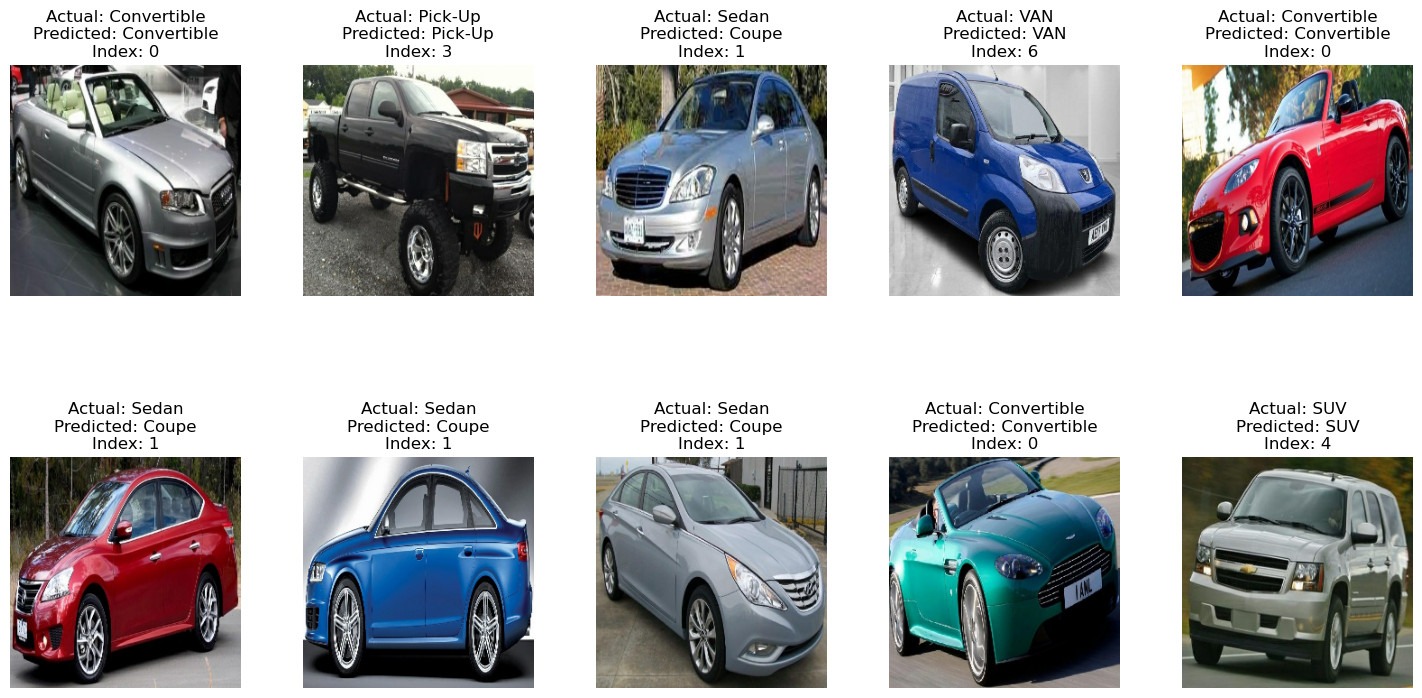

In [224]:
#predicting the body type of car images from test dataset
import matplotlib.pyplot as plt
import numpy as np

test_images = []
test_labels = []
test_iterator = test.as_numpy_iterator()

#mapping with indices for easier understanding
label_mapping = {
    "Convertible": 0,
    "Coupe": 1,
    "Hatchback": 2,
    "Pick-Up": 3,
    "Sedan": 4,
    "SUV": 5,
    "VAN": 6
}  

#only displaying 10 images 
for _ in range(10): 
    images, labels = next(test_iterator)
    test_images.extend(images)
    test_labels.extend(labels)
print("Test Labels:", test_labels)

# Predict class indices for the 10 images
predicted_indices = []
for image in test_images:
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_index = np.argmax(prediction)
    predicted_indices.append(predicted_index)

# Display images with actual and predicted values
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14.8, 8))
fig.tight_layout()

for i, (image, actual_label) in enumerate(zip(test_images, test_labels)):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    actual_label_index = actual_label 
    actual_label_name = model_names[actual_label_index]
    predicted_label_name = model_names[predicted_indices[i]]

    ax.imshow(image)
    ax.set_title(f"Actual: {actual_label_name}\nPredicted: {predicted_label_name}\nIndex: {predicted_indices[i]}")
    ax.axis("off")

plt.show()